In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\MERINA ANGEL\\Downloads\\penguins_size.csv') #reading csv file

In [3]:
df.head() #printing 5 rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.dtypes #data types of all columns

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
df.info() #information of all columns and there missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

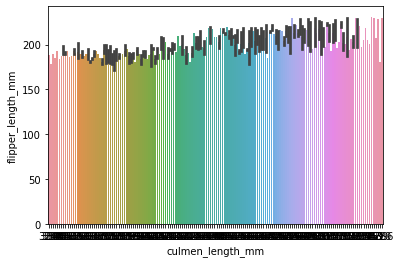

In [6]:
sns.barplot(x=df['culmen_length_mm'],y=df['flipper_length_mm'],data=df )

Text(0, 0.5, 'sex')

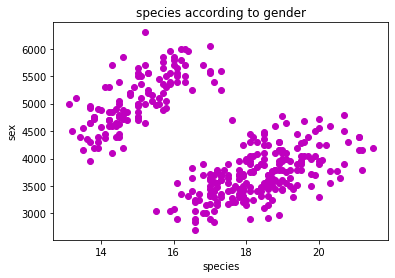

In [7]:
plt.scatter(x=df['culmen_depth_mm'],y=df['body_mass_g'],color='m')

plt.title("species according to gender")

plt.xlabel("species")

plt.ylabel("sex")  #relation between survived and fare columns using scatter

<AxesSubplot:>

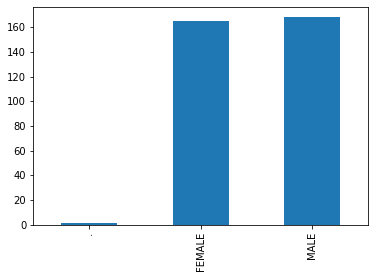

In [8]:
df['sex'].value_counts().sort_index().plot.bar()

In [9]:
df.describe() #5 point summary 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
df.isnull().sum() #null values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
x=df['sex'].mode()  #finding mode values

In [12]:
x

0    MALE
Name: sex, dtype: object

In [13]:
a=df['sex'].isnull().sum() #null values of 'sex' column

In [14]:
a

10

In [15]:
df['sex'].fillna(0,inplace=True) #filling null values with 0

In [16]:
df['sex'].replace([0,'.'],'MALE',inplace=True)  #replacing '0,.' with male value i.e., mode

In [17]:
df['sex'].value_counts() #unique values of sex column

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [18]:
df.shape #rows and columns

(344, 7)

In [19]:
df.replace(np.nan,df.mean(),inplace=True) #replacing null values with mean of all numeric columns

C:\Users\MERINA ANGEL\AppData\Local\Temp\ipykernel_16400\687146601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.replace(np.nan,df.mean(),inplace=True) #replacing null values with mean of all numeric columns


In [20]:
df.isnull().sum()  #seeing null values


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
numeric=df._get_numeric_data().columns
numeric #seeing numeric values

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [22]:
numeric=pd.DataFrame(numeric) #converting numeric column to dataframe

In [23]:
numeric

,0
0,culmen_length_mm
1,culmen_depth_mm
2,flipper_length_mm
3,body_mass_g


In [24]:
categoric=df.columns[df.dtypes=='object']   #seeing categorical columns of the dataset

In [25]:
categoric

Index(['species', 'island', 'sex'], dtype='object')

<AxesSubplot:>

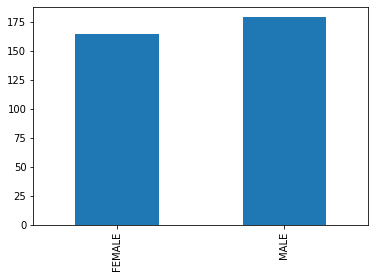

In [26]:
df['sex'].value_counts().sort_index().plot.bar()

# one hote encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder  #importing onehotencoder


In [28]:
cat_cols=pd.get_dummies(data=df,drop_first=True) #converting categorical values into numeric

In [29]:
cat_cols

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,0,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,1,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,1,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,1,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,1,0,0,0


# automatic EDA

In [30]:
#!pip install sweetviz #installing sweetviz library

In [31]:
import sweetviz as sv #importing the sweetviz library as sv

In [32]:
sweet_report=sv.analyze(df) #analyzing the df using sweetviz library

                                             |                                             | [  0%]   00:00 ->…

In [33]:
sweet_report.show_html('sweet_report.html') #showing in html file

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [34]:
#!pip install dtale

In [35]:
import dtale as dt  #importing dtale library as dt

In [36]:
dt.show(df) #importing df file to dtale library